# OpenCV használata Python programozási nyelv használatával

## Szükséges csomagok telepítése

In [1]:
!pip install opencv-python

In [2]:
# opencv beolvasása
import cv2
# numpy a mátrix műveletekhez
import numpy as np
# megjelenítéshez
import matplotlib.pyplot as plt
# matplotlib használata notebookban
%matplotlib inline

## Kép beolvasása fájlból

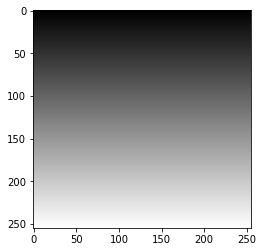

In [3]:
img = cv2.imread('grad.png',0)
plt.imshow(img,  cmap='gray')
plt.show()

## Kép olvasása internetről

In [4]:
import urllib
# függvény, mellyel url alapján képet adunk vissza
def web_olvasas(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

img = web_olvasas('http://www.kate.hu/wp-content/uploads/2017/11/798428_554228867928878_198618769_o.jpg')
plt.imshow(img)
plt.show()
# Érdemes megfigyelni a kimenet színét, később megljátjuk miért ilyen

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

## Képek beolvasása webkameráról

In [ ]:
import cv2
import numpy as np

# létrehozzuk a capture objektumot
cap = cv2.VideoCapture(0)

while(1):
    _, frame = cap.read()
    # kép megjelenítése 'kép' nevű ablakkal
    cv2.imshow('kép',frame)
    # billentyűzet lenyomás vizsgálata
    k = cv2.waitKey(5) & 0xFF
    # Ha ESC akkor kilép
    if k == 27:
        break
# Minden OpenCV által nyitott ablak bezására
cv2.destroyAllWindows()
# El kell engedni a kamera beolvasást
cap.release()

## Színtér konvertálás

In [ ]:
# korábbi képen láthattuk, hogy a csatornák sorrendje nem RGB
img = web_olvasas('http://www.kate.hu/wp-content/uploads/2017/11/798428_554228867928878_198618769_o.jpg')
# konverzió BGR és RGB között
new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(new_img)
plt.show()

In [ ]:
img = web_olvasas('http://www.kate.hu/wp-content/uploads/2017/11/798428_554228867928878_198618769_o.jpg')
# főleg a színkereséshez használható HSV-ben konvertálás
new_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(new_img)
plt.show()

In [6]:
# legszuperebb színkiválasztó.py

import cv2
import numpy as np

def nothing(x):
    pass

# kép beolvasása
#image = cv2.imread(r"kepem.jpg") #fájlból
image = web_olvasas('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQyS5-iaFzFxjnTMJKlriN-RxQcJto5kWu0sI5WhzB4Oj6sOqLC&s')
multi = 3
img = cv2.resize(image, (0,0), fx=multi, fy=multi) 
img_ = cv2.resize(image, (0,0), fx=multi, fy=multi) 
# cap = cv2.VideoCapture(0)

cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('H_low','image',0,255,nothing)
cv2.createTrackbar('S_low','image',0,255,nothing)
cv2.createTrackbar('V_low','image',0,255,nothing)
cv2.createTrackbar('H_high','image',0,255,nothing)
cv2.createTrackbar('S_high','image',0,255,nothing)
cv2.createTrackbar('V_high','image',0,255,nothing)

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image',0,1,nothing)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    # ESC a kilépéshez
    if k == 27:
        break

    # get current positions of four trackbars
    H_low = cv2.getTrackbarPos('H_low','image')
    S_low = cv2.getTrackbarPos('S_low','image')
    V_low = cv2.getTrackbarPos('V_low','image')
    H_high = cv2.getTrackbarPos('H_high','image')
    S_high = cv2.getTrackbarPos('S_high','image')
    V_high = cv2.getTrackbarPos('V_high','image')
    s = cv2.getTrackbarPos(switch,'image')

    if s == 0:
        img[:] = img_
    else:
        hsv = cv2.cvtColor(img_, cv2.COLOR_BGR2HSV)
        lower_blue = np.array([H_low, S_low, V_low])
        upper_blue = np.array([H_high, S_high, V_high])
        mask = cv2.inRange(hsv, lower_blue, upper_blue)
        res = cv2.bitwise_and(img_,img_, mask= mask)
        img[:] = res[:]

cv2.destroyAllWindows()

In [ ]:
img = web_olvasas('http://www.kate.hu/wp-content/uploads/2017/11/798428_554228867928878_198618769_o.jpg')
new_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(new_img,  cmap='gray')
plt.show()

## Hisztogram

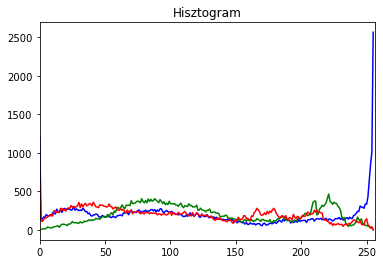

In [7]:
img = web_olvasas('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQyS5-iaFzFxjnTMJKlriN-RxQcJto5kWu0sI5WhzB4Oj6sOqLC&s')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Hisztogram')
plt.show()

# Konvolúció

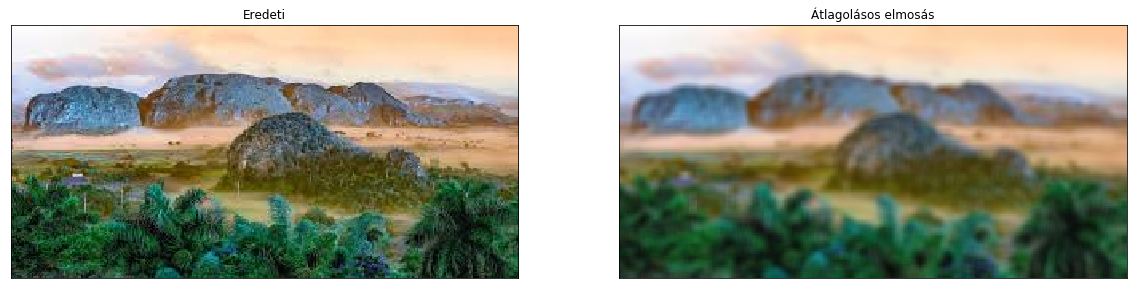

In [8]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = web_olvasas('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQyS5-iaFzFxjnTMJKlriN-RxQcJto5kWu0sI5WhzB4Oj6sOqLC&s')
# konvolúciós kernel leétrehozása
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img),plt.title('Eredeti')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Átlagolásos elmosás')
plt.xticks([]), plt.yticks([])
plt.show()

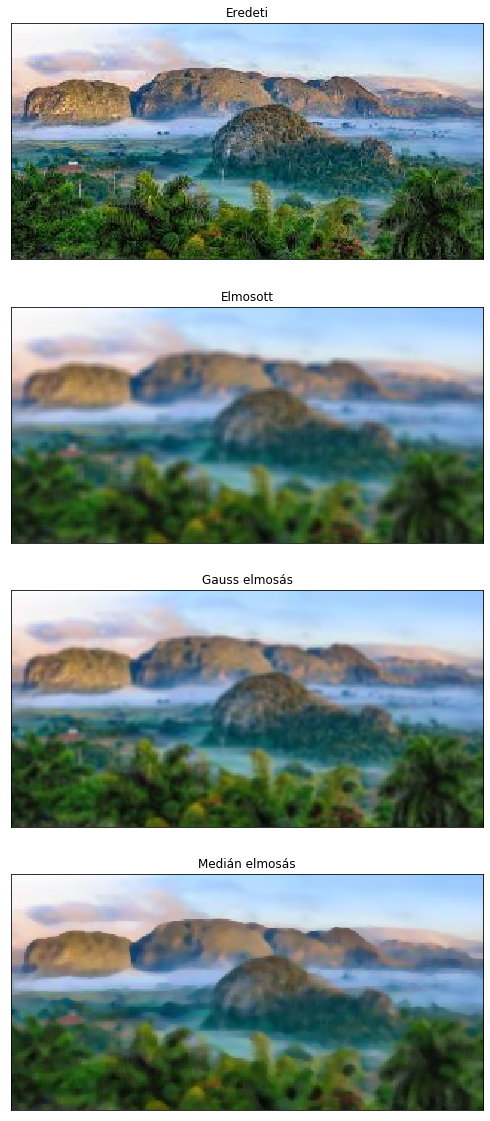

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = web_olvasas('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQyS5-iaFzFxjnTMJKlriN-RxQcJto5kWu0sI5WhzB4Oj6sOqLC&s')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
blur = cv2.blur(img,(5,5))
gauss_blur = cv2.GaussianBlur(img,(5,5),0)
median = cv2.medianBlur(img,5)

plt.figure(figsize=(10,20))
plt.subplot(411),plt.imshow(img),plt.title('Eredeti')
plt.xticks([]), plt.yticks([])
plt.subplot(412),plt.imshow(blur),plt.title('Elmosott')
plt.xticks([]), plt.yticks([])
plt.subplot(413),plt.imshow(gauss_blur),plt.title('Gauss elmosás')
plt.xticks([]), plt.yticks([])
plt.subplot(414),plt.imshow(median),plt.title('Medián elmosás')
plt.xticks([]), plt.yticks([])
plt.show()

In [11]:
%timeit cv2.blur(img,(5,5))
%timeit cv2.filter2D(img,-1,kernel)
# ez alapján blur-t érdemes erre használni

136 µs ± 16.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
532 µs ± 37.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Élkeresés

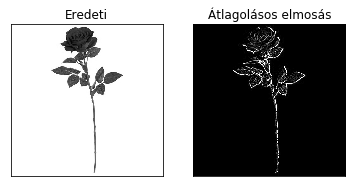

In [12]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
url = 'https://target.scene7.com/is/image/Target/GUEST_77a8a45f-fefc-402e-97d9-960e628eff93?wid=488&hei=488&fmt=pjpeg'
img = web_olvasas(url)
# konvolúciós kernel leétrehozása
# Robert
kernel_R1 = np.array([[0,-1],[1,0]],np.float32)
kernel_R2 = np.array([[-1,0],[0,1]],np.float32)
# Prewitt
kernel_P1 = np.array([[-1,-1,-1],[0,0,0],[1,1,1]],np.float32)
kernel_P2 = np.array([[-1,0,1],[-1,0,1],[-1,0,1]],np.float32)
# Sober
kernel_S1 = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],np.float32)
kernel_S2 = np.array([[-1,0,1],[-2,0,2],[-1,0,1]],np.float32)

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
dst1 = cv2.filter2D(img,-1,kernel_S1)
dst2 = cv2.filter2D(img,-1,kernel_S2)
dst = dst1+dst2
plt.subplot(121),plt.imshow(img,cmap = 'gray'),plt.title('Eredeti')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst,cmap = 'gray'),plt.title('Átlagolásos elmosás')
plt.xticks([]), plt.yticks([])
plt.show()

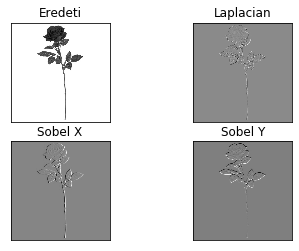

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

url = 'https://target.scene7.com/is/image/Target/GUEST_77a8a45f-fefc-402e-97d9-960e628eff93?wid=488&hei=488&fmt=pjpeg'
img = web_olvasas(url)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Eredeti'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

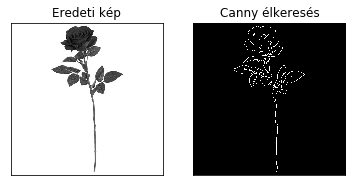

In [14]:
url = 'https://target.scene7.com/is/image/Target/GUEST_77a8a45f-fefc-402e-97d9-960e628eff93?wid=488&hei=488&fmt=pjpeg'
img = web_olvasas(url)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Eredeti kép'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Canny élkeresés'), plt.xticks([]), plt.yticks([])

plt.show()

# Éles kép=1.5*kép-0.5*Blur(kép)

(159, 318, 3)


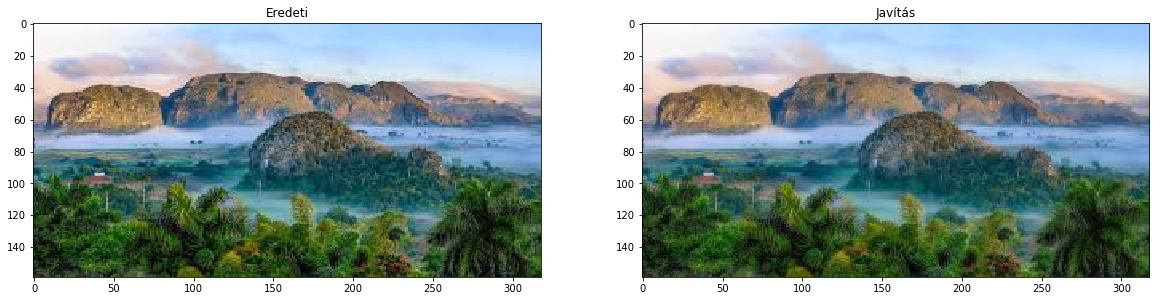

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = web_olvasas('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQyS5-iaFzFxjnTMJKlriN-RxQcJto5kWu0sI5WhzB4Oj6sOqLC&s')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
blur = cv2.blur(img,(5,5))
gauss_blur = cv2.GaussianBlur(img,(5,5),0)
median = cv2.medianBlur(img,5)
print(np.shape((img*1.5+0.5*blur)/2))
plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(img), plt.title('Eredeti')
plt.subplot(122), plt.imshow(((img*1.5+0.5*blur)/2).astype(int)), plt.title('Javítás')
plt.show()

# Threshold 

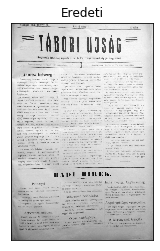

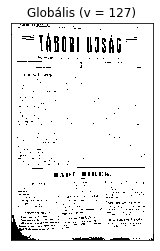

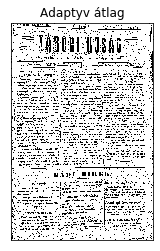

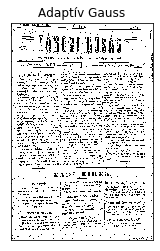

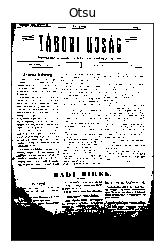

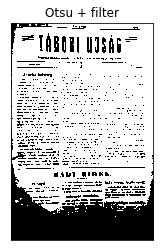

In [16]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#img = cv.imread(r"grad.png",0)

url = 'https://m.blog.hu/na/nagyhaboru/image/hetkoznapok/ujsag/ujsagok_04_large.jpg'
img = web_olvasas(url)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
ret2,th4 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th5 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

titles = ['Eredeti', 'Globális (v = 127)',
            'Adaptyv átlag', 'Adaptív Gauss',
         'Otsu', 'Otsu + filter']
images = [img, th1, th2, th3, th4, th5]
for i in range(6):
    #plt.subplot(2,2,i+1),
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    plt.show()

# Zajcsökkentő élkiemelés

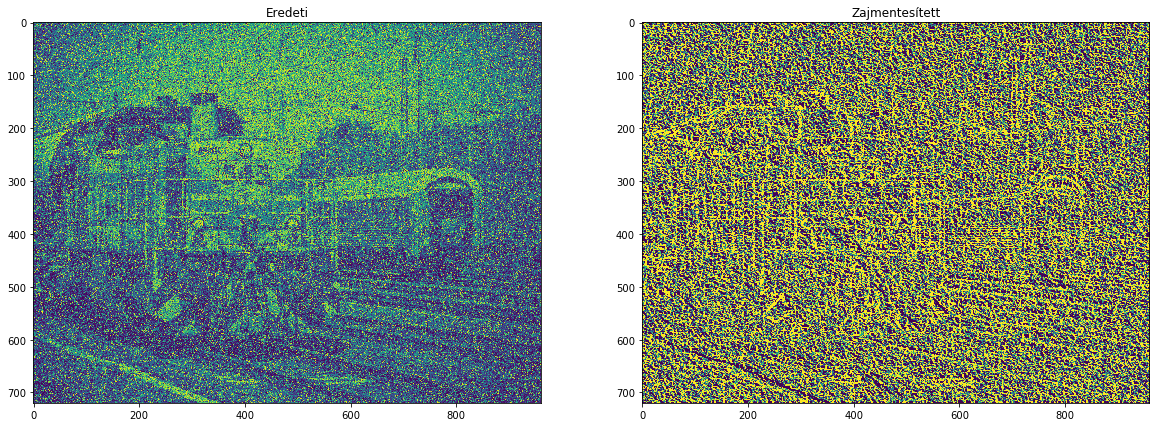

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

url = 'https://i.stack.imgur.com/J13Wn.jpg'
img = web_olvasas(url)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel_1 = np.array([[-1, -1, -1,0, 1, 1, 1],[-1, -1, -1,0, 1, 1, 1],[-1, -1, -1,0, 1, 1, 1],[-1, -1, -1,0, 1, 1, 1],[-1, -1, -1,0, 1, 1, 1]],np.float32)
kernel_2 = np.array([[1,1,1,1,1], [1,1,1,1,1], [0,0,0,0,0], [-1,-1,-1,-1,-1],[-1,-1,-1,-1,-1]])
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
dst1 = cv2.filter2D(img,-1,kernel_1)
dst2 = cv2.filter2D(img,-1,kernel_2)
blur = cv2.blur(img,(5,5))

plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(img), plt.title('Eredeti')
plt.subplot(122), plt.imshow(((dst1+dst2)/2).astype(int)), plt.title('Zajmentesített')
plt.show()

# Kmeans

In [18]:
import numpy as np
import cv2

img = web_olvasas('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQyS5-iaFzFxjnTMJKlriN-RxQcJto5kWu0sI5WhzB4Oj6sOqLC&s')
Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

cv2.imshow('res2',res2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Hough line

In [19]:
import cv2
import numpy as np

url = 'https://e-cars.hu/wp-content/uploads/2019/11/Screen-Shot-2019-11-22-at-5.43.39-AM.jpg'
img = img = web_olvasas(url)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,100)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
cv2.imshow('Élek',edges)
cv2.imshow('Vonalakkal',img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [20]:
import cv2
import numpy as np

url = 'https://opencv-python-tutroals.readthedocs.io/en/latest/_static/opencv-logo-white.png'
img = img = web_olvasas(url)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(img,5)
#cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(img,(i[0],i[1]),2,(0,0,255),3)

cv2.imshow('detected circles',img)
cv2.waitKey(0)
cv2.destroyAllWindows()